# Section 4: Error Analysis for Regression Models

## Bike Sharing Dataset - Comprehensive Error Analysis

This notebook provides comprehensive error analysis for regression models trained on the bike sharing dataset.

**Analysis Components:**
- **Cross-Model Error Comparison**: Compare error patterns across XGBoost, FT-Transformer, and SAINT
- **Residual Analysis**: Detailed residual pattern analysis for each model
- **Feature-based Error Analysis**: Which features cause prediction errors
- **Model-Specific Insights**: Deep dive into each model's error characteristics
- **Business Insights**: Actionable recommendations for bike sharing operations

**Models Analyzed:**
- XGBoost, FT-Transformer (Improved), FT-Transformer (Original), SAINT
- Focus on understanding prediction errors for bike sharing demand

## 1. Import Required Libraries and Functions

In [1]:
# Import the error analysis functions from our custom module
from section4_error_analysis_functions import (
    setup_error_analysis_environment,
    load_regression_models_and_data,
    generate_model_predictions,
    calculate_regression_errors,
    analyze_residuals,
    perform_cross_model_error_comparison,
    analyze_feature_based_errors,
    generate_error_visualizations,
    analyze_model_specific_errors,
    generate_business_insights,
    save_error_analysis_results,
    run_complete_error_analysis,
    compare_error_patterns_across_models,
    analyze_temporal_error_patterns
)

# Import additional libraries for display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memory management utilities
import gc
import pickle
import os

## 2. Setup Error Analysis Environment

In [2]:
# Setup the error analysis environment
setup_error_analysis_environment()

🔍 Section 4: Regression Error Analysis
Dataset: Bike Sharing Demand Prediction
✅ Error analysis environment setup complete!


True

## 3. Option 1: Run Complete Error Analysis Pipeline (Recommended)

This single function call will run the entire error analysis pipeline:

In [ ]:
# Run the complete error analysis pipeline
results = run_complete_error_analysis(
    section2_results_file='./bike_sharing_section2_results.pkl',
    preprocessed_data_file='./bike_sharing_preprocessed_data.pkl'
)

if results:
    print("\n🎉 Complete error analysis finished!")
    print(f"📊 Models analyzed: {results['models_analyzed']}")
    print(f"📁 Results saved to: {results['results_dir']}")
    print(f"🏆 Best model: {results['business_insights']['best_model']}")
else:
    print("❌ Error analysis failed. Please check the logs above.")

## 4. Option 2: Step-by-Step Error Analysis (For Detailed Control)

If you prefer to run the analysis step-by-step for more control, use the following cells:

### 4.1 Load Models and Data

In [3]:
# Load regression models and data
data = load_regression_models_and_data()

if data and data['models']:
    print(f"\n📊 Data loaded successfully!")
    print(f"Models available: {list(data['models'].keys())}")
    print(f"Features: {len(data['feature_names'])}")
    print(f"Test samples: {len(data['X_test_scaled']):,}")
    
    # Extract variables for step-by-step analysis
    models = data['models']
    X_test_scaled = data['X_test_scaled']
    y_test = data['y_test']
    feature_names = data['feature_names']
    device = data['device']
else:
    print("❌ Failed to load models and data")


📂 Loading trained models and data...
📊 Loading preprocessed data...
✅ Data loaded successfully!
   Test samples: 3,476
   Features: 13
🔄 Loading all available models...
📦 Loading XGBoost model...
✅ XGBoost model loaded successfully!
📦 Loading Improved FT-Transformer model...
✅ Improved FT-Transformer model loaded successfully!
📦 Loading SAINT model...
✅ SAINT model loaded successfully!
✅ Successfully loaded 3 models: ['XGBoost', 'Improved FT-Transformer', 'SAINT']

✅ Data loaded successfully!
   Models available: ['XGBoost', 'Improved FT-Transformer', 'SAINT']
   Features: 13
   Training samples: 11,122
   Test samples: 3,476

📊 Data loaded successfully!
Models available: ['XGBoost', 'Improved FT-Transformer', 'SAINT']
Features: 13
Test samples: 3,476


### 4.2 Generate Model Predictions

In [4]:
# Generate predictions from all models
predictions, prediction_details = generate_model_predictions(models, X_test_scaled, device)

if predictions:
    print(f"\n✅ Predictions generated for {len(predictions)} models")
    for model_name, y_pred in predictions.items():
        print(f"   {model_name}: {len(y_pred)} predictions")
else:
    print("❌ No predictions generated")


🔮 Generating predictions from all models...
   Processing XGBoost...
     ✅ Generated 3476 predictions
   Processing Improved FT-Transformer...
     🔧 Applied target inverse scaling for Improved FT-Transformer
     ✅ Generated 3476 predictions
   Processing SAINT...
     ✅ Generated 3476 predictions

✅ Predictions generated for 3 models

✅ Predictions generated for 3 models
   XGBoost: 3476 predictions
   Improved FT-Transformer: 3476 predictions
   SAINT: 3476 predictions


### 4.3 Calculate Error Metrics

In [5]:
# Calculate comprehensive error metrics
error_metrics = calculate_regression_errors(predictions, y_test)

print("\n📊 ERROR METRICS SUMMARY")
print("=" * 60)
for model_name, metrics in error_metrics.items():
    print(f"\n{model_name}:")
    print(f"   RMSE: {metrics['RMSE']:.4f}")
    print(f"   MAE:  {metrics['MAE']:.4f}")
    print(f"   R²:   {metrics['R2']:.4f}")
    print(f"   MAPE: {metrics['MAPE']:.2f}%")


📊 Calculating regression error metrics...
   XGBoost: RMSE=37.9232, MAE=23.8845, R²=0.9546
   Improved FT-Transformer: RMSE=44.1403, MAE=27.9566, R²=0.9385
   SAINT: RMSE=46.5453, MAE=29.5580, R²=0.9316

📊 ERROR METRICS SUMMARY

XGBoost:
   RMSE: 37.9232
   MAE:  23.8845
   R²:   0.9546
   MAPE: 0.45%

Improved FT-Transformer:
   RMSE: 44.1403
   MAE:  27.9566
   R²:   0.9385
   MAPE: 0.39%

SAINT:
   RMSE: 46.5453
   MAE:  29.5580
   R²:   0.9316
   MAPE: 0.34%


### 4.4 Analyze Residual Patterns

In [6]:
# Analyze residual patterns
residual_analysis = analyze_residuals(error_metrics, predictions, y_test)

print("\n🔍 RESIDUAL ANALYSIS SUMMARY")
print("=" * 60)
for model_name, analysis in residual_analysis.items():
    print(f"\n{model_name}:")
    print(f"   Normal residuals: {analysis['is_normal']}")
    print(f"   Homoscedastic: {analysis['is_homoscedastic']}")
    print(f"   Outliers: {analysis['outlier_percentage']:.1f}%")


🔍 Analyzing residual patterns...
   XGBoost: Normal=False, Homoscedastic=False, Outliers=5.0%
   Improved FT-Transformer: Normal=False, Homoscedastic=False, Outliers=5.0%
   SAINT: Normal=False, Homoscedastic=False, Outliers=5.0%

🔍 RESIDUAL ANALYSIS SUMMARY

XGBoost:
   Normal residuals: False
   Homoscedastic: False
   Outliers: 5.0%

Improved FT-Transformer:
   Normal residuals: False
   Homoscedastic: False
   Outliers: 5.0%

SAINT:
   Normal residuals: False
   Homoscedastic: False
   Outliers: 5.0%


### 4.5 Cross-Model Error Comparison

In [7]:
# Perform cross-model error comparison
comparison_df = perform_cross_model_error_comparison(error_metrics)

print("\n🏆 MODEL RANKING (by Overall Performance):")
print(comparison_df[['Model', 'RMSE', 'MAE', 'R2', 'Overall_Rank']].to_string(index=False))


📈 Performing cross-model error comparison...
📊 CROSS-MODEL ERROR COMPARISON
                  Model    RMSE     MAE     R2   MAPE  Max_Error  Q95_Error  Residual_Std  Residual_Skew  Residual_Kurtosis  RMSE_Rank  MAE_Rank  R2_Rank  Overall_Rank
                XGBoost 37.9232 23.8845 0.9546 0.4525   386.8456    75.7231       37.9215         0.7110            13.5909        1.0       1.0      1.0           1.0
Improved FT-Transformer 44.1403 27.9566 0.9385 0.3941   438.7831    90.1096       44.0310         1.0791            11.5480        2.0       2.0      2.0           2.0
                  SAINT 46.5453 29.5580 0.9316 0.3389   423.0421   100.2028       46.4665         0.5374             9.0135        3.0       3.0      3.0           3.0

💾 Results saved to 'cross_model_error_comparison.csv'

🏆 MODEL RANKING (by Overall Performance):
                  Model      RMSE       MAE       R2  Overall_Rank
                XGBoost 37.923165 23.884511 0.954582           1.0
Improved FT-Transfo

### 4.6 Feature-Based Error Analysis

In [8]:
# Analyze feature-based error patterns
feature_error_analysis = analyze_feature_based_errors(
    models, predictions, error_metrics, X_test_scaled, y_test, feature_names
)

print("\n🎯 FEATURE-BASED ERROR ANALYSIS COMPLETED")
for model_name, analysis in feature_error_analysis.items():
    significant_count = len(analysis['significant_features'])
    total_features = len(feature_names)
    print(f"   {model_name}: {significant_count}/{total_features} significant features")


🎯 Analyzing feature-based error patterns...

   Analyzing XGBoost...
     High-error samples: 695 (20.0%)
     Significant features: 11/13
     Top problematic features:
       1. hr: effect_size=0.490
       2. instant: effect_size=0.399
       3. temp: effect_size=0.331
       4. atemp: effect_size=0.326
       5. yr: effect_size=0.298

   Analyzing Improved FT-Transformer...
     High-error samples: 695 (20.0%)
     Significant features: 12/13
     Top problematic features:
       1. atemp: effect_size=0.494
       2. temp: effect_size=0.491
       3. hr: effect_size=0.415
       4. instant: effect_size=0.395
       5. yr: effect_size=0.324

   Analyzing SAINT...
     High-error samples: 695 (20.0%)
     Significant features: 11/13
     Top problematic features:
       1. temp: effect_size=0.456
       2. atemp: effect_size=0.454
       3. hr: effect_size=0.385
       4. instant: effect_size=0.347
       5. yr: effect_size=0.317

🎯 FEATURE-BASED ERROR ANALYSIS COMPLETED
   XGBoost:

### 4.7 Generate Error Visualizations


📊 Generating error visualizations...


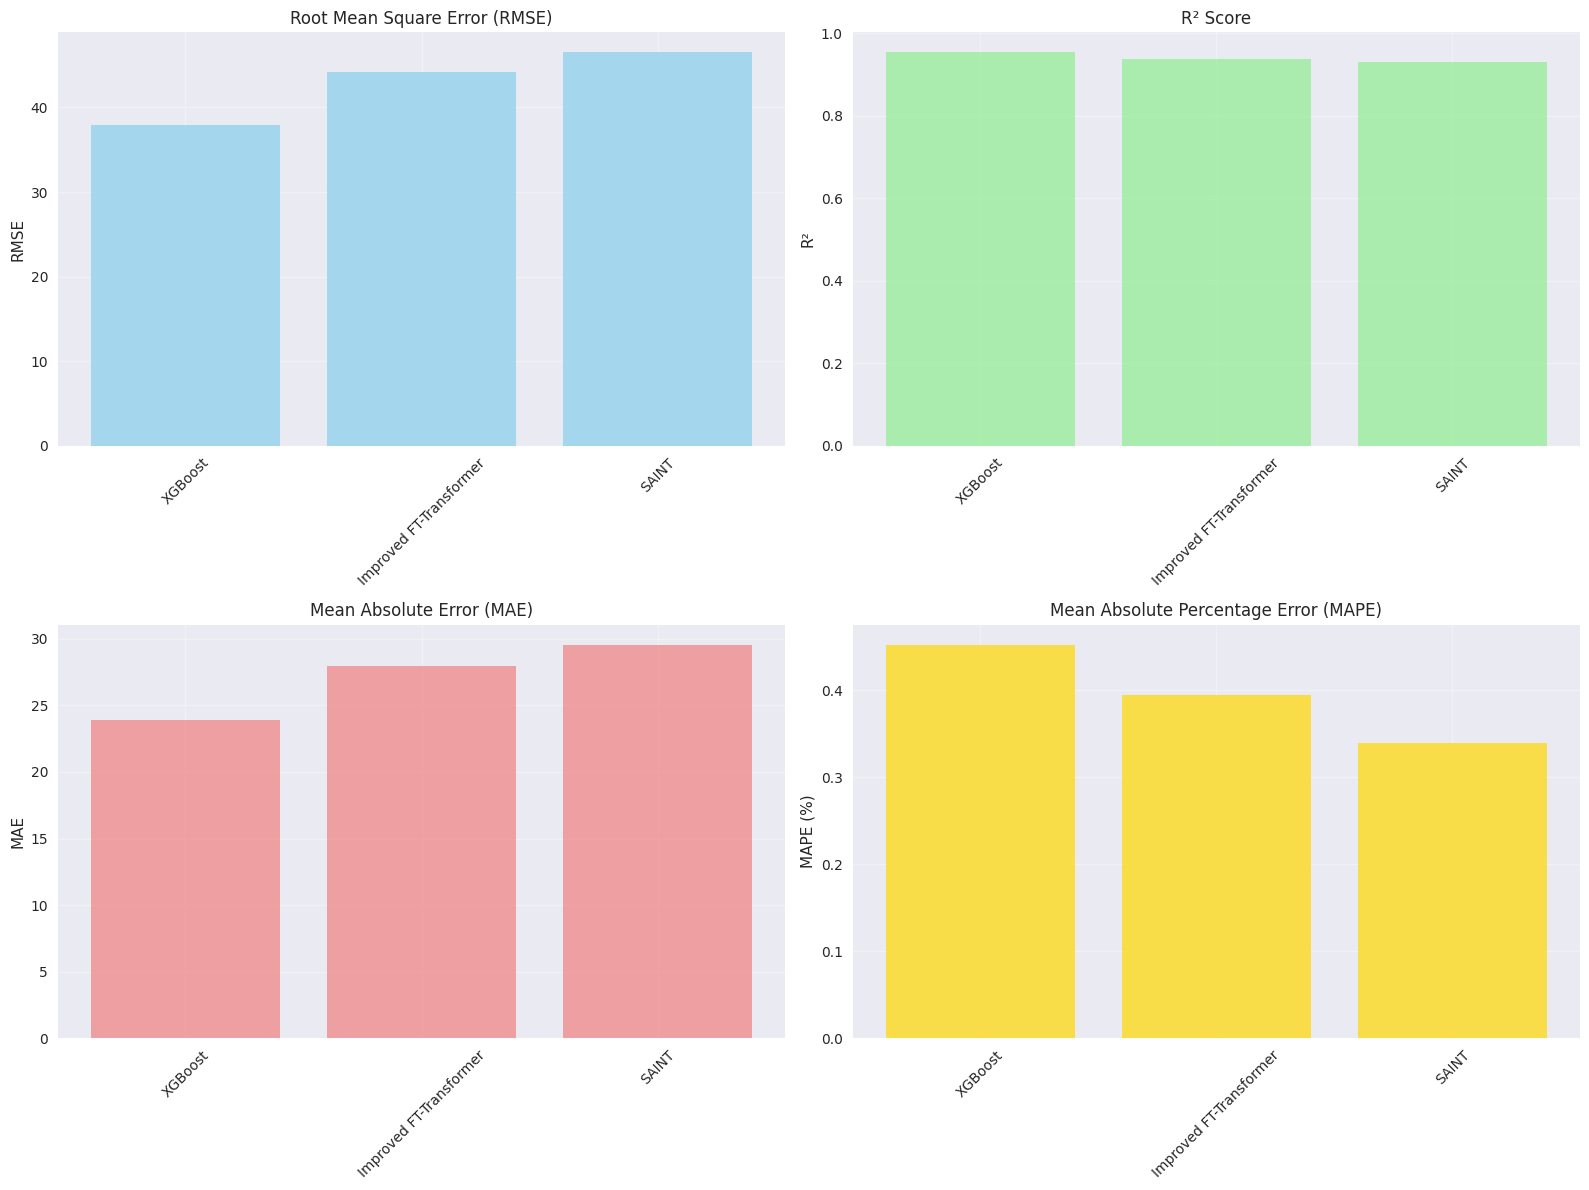

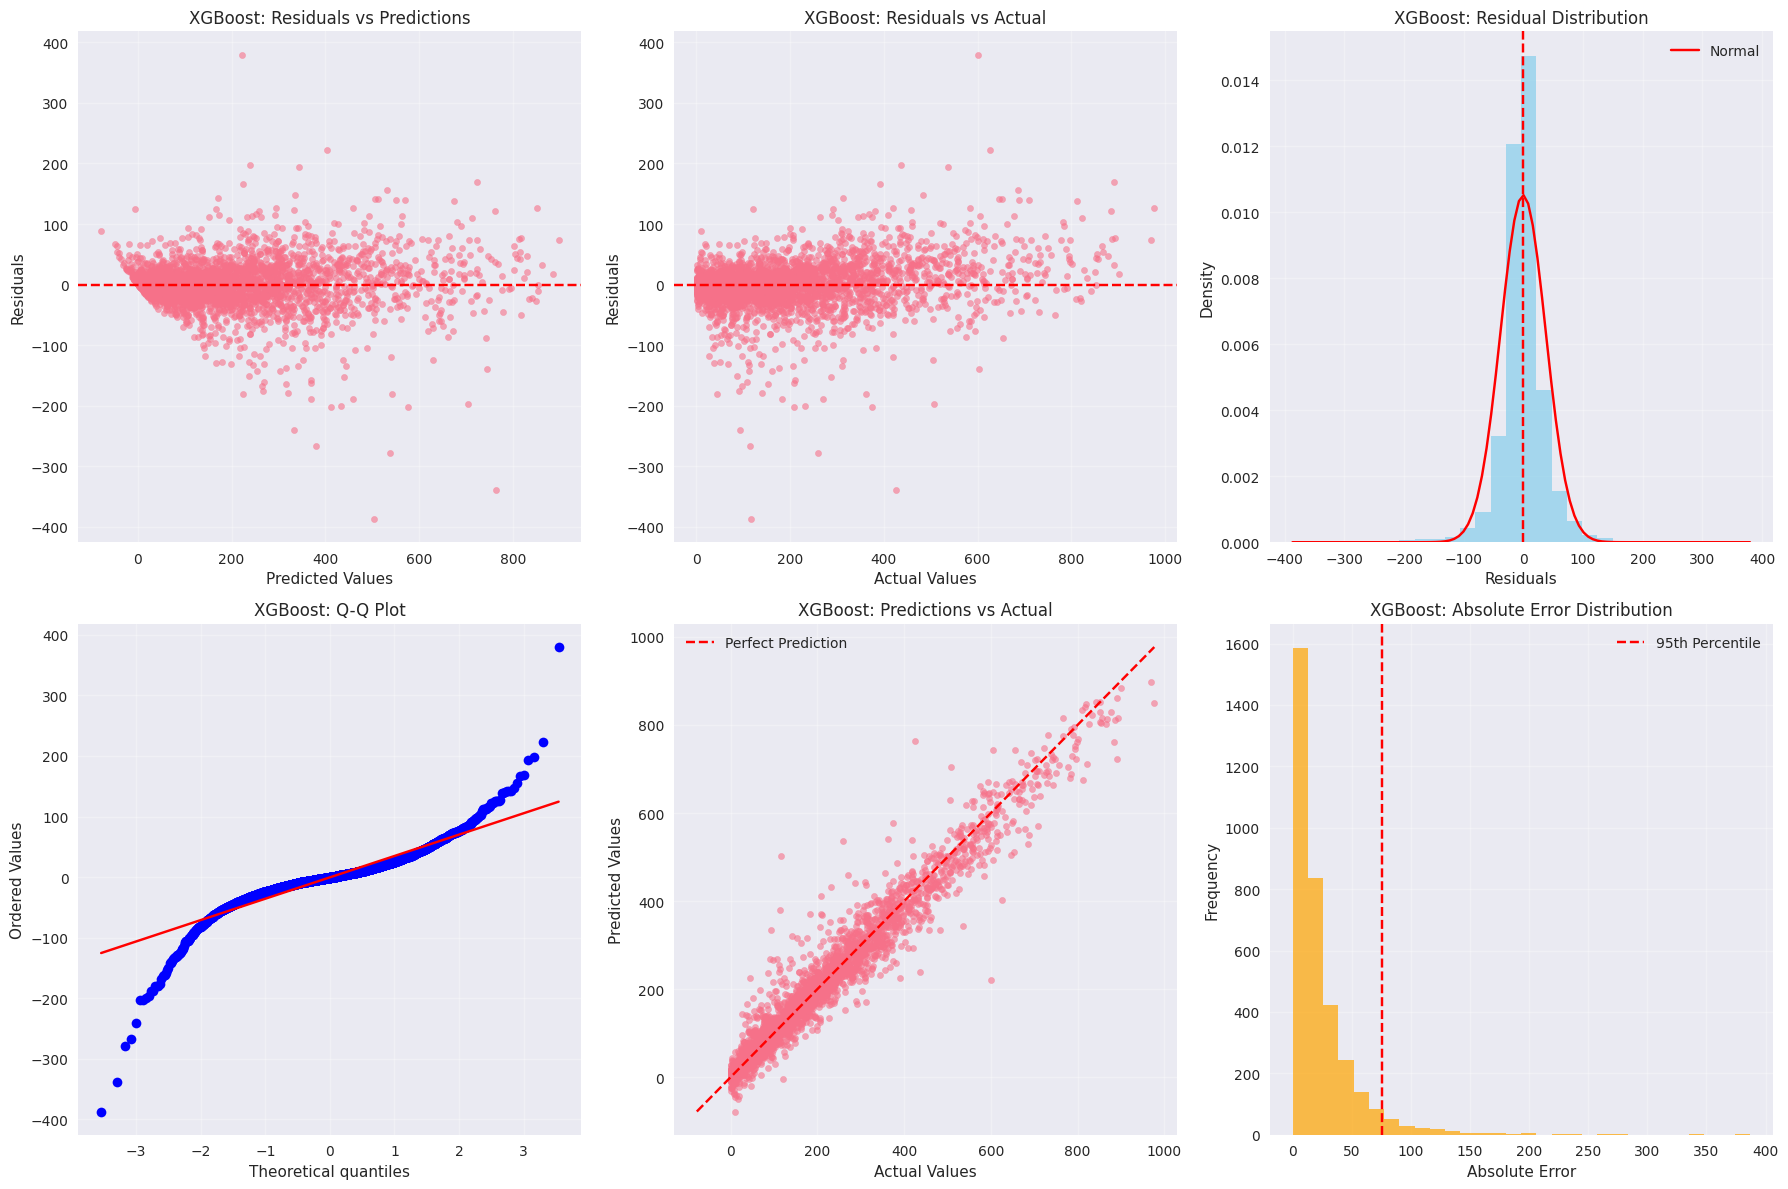

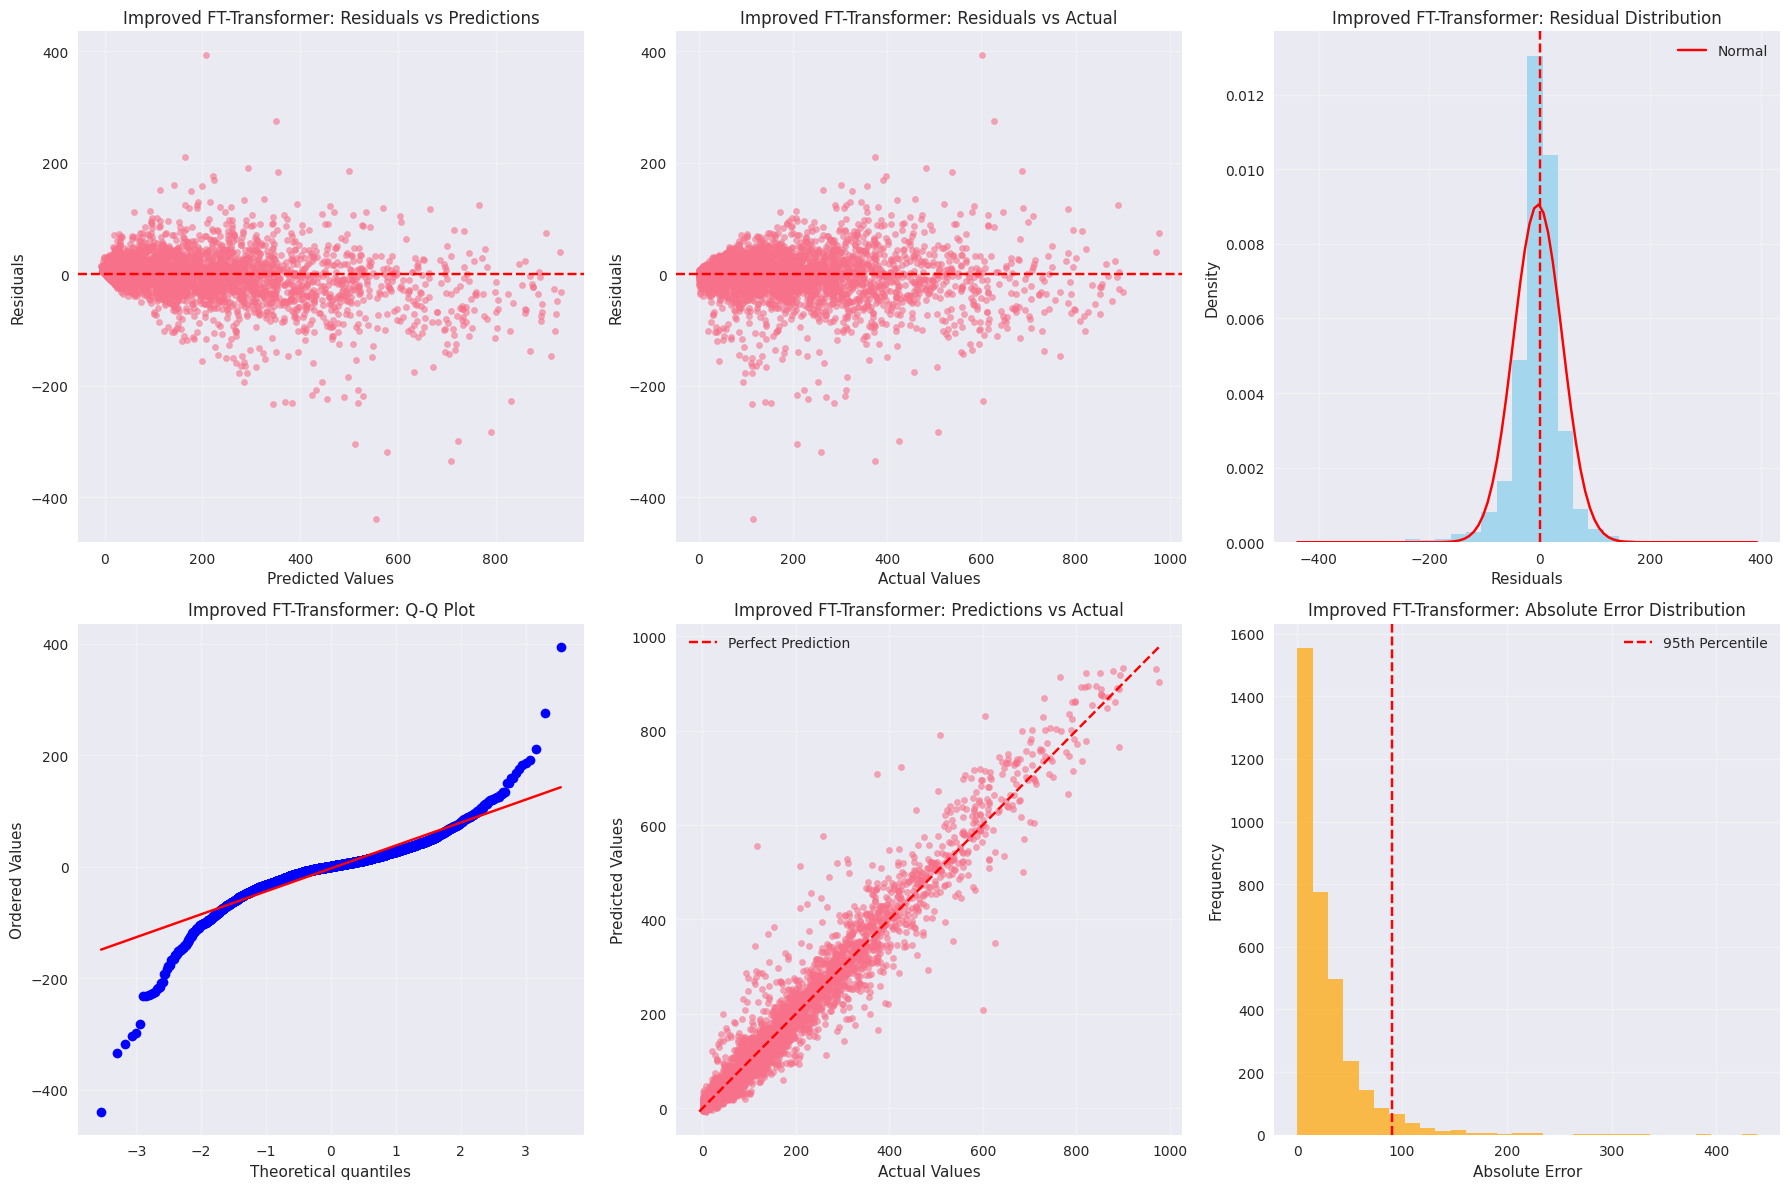

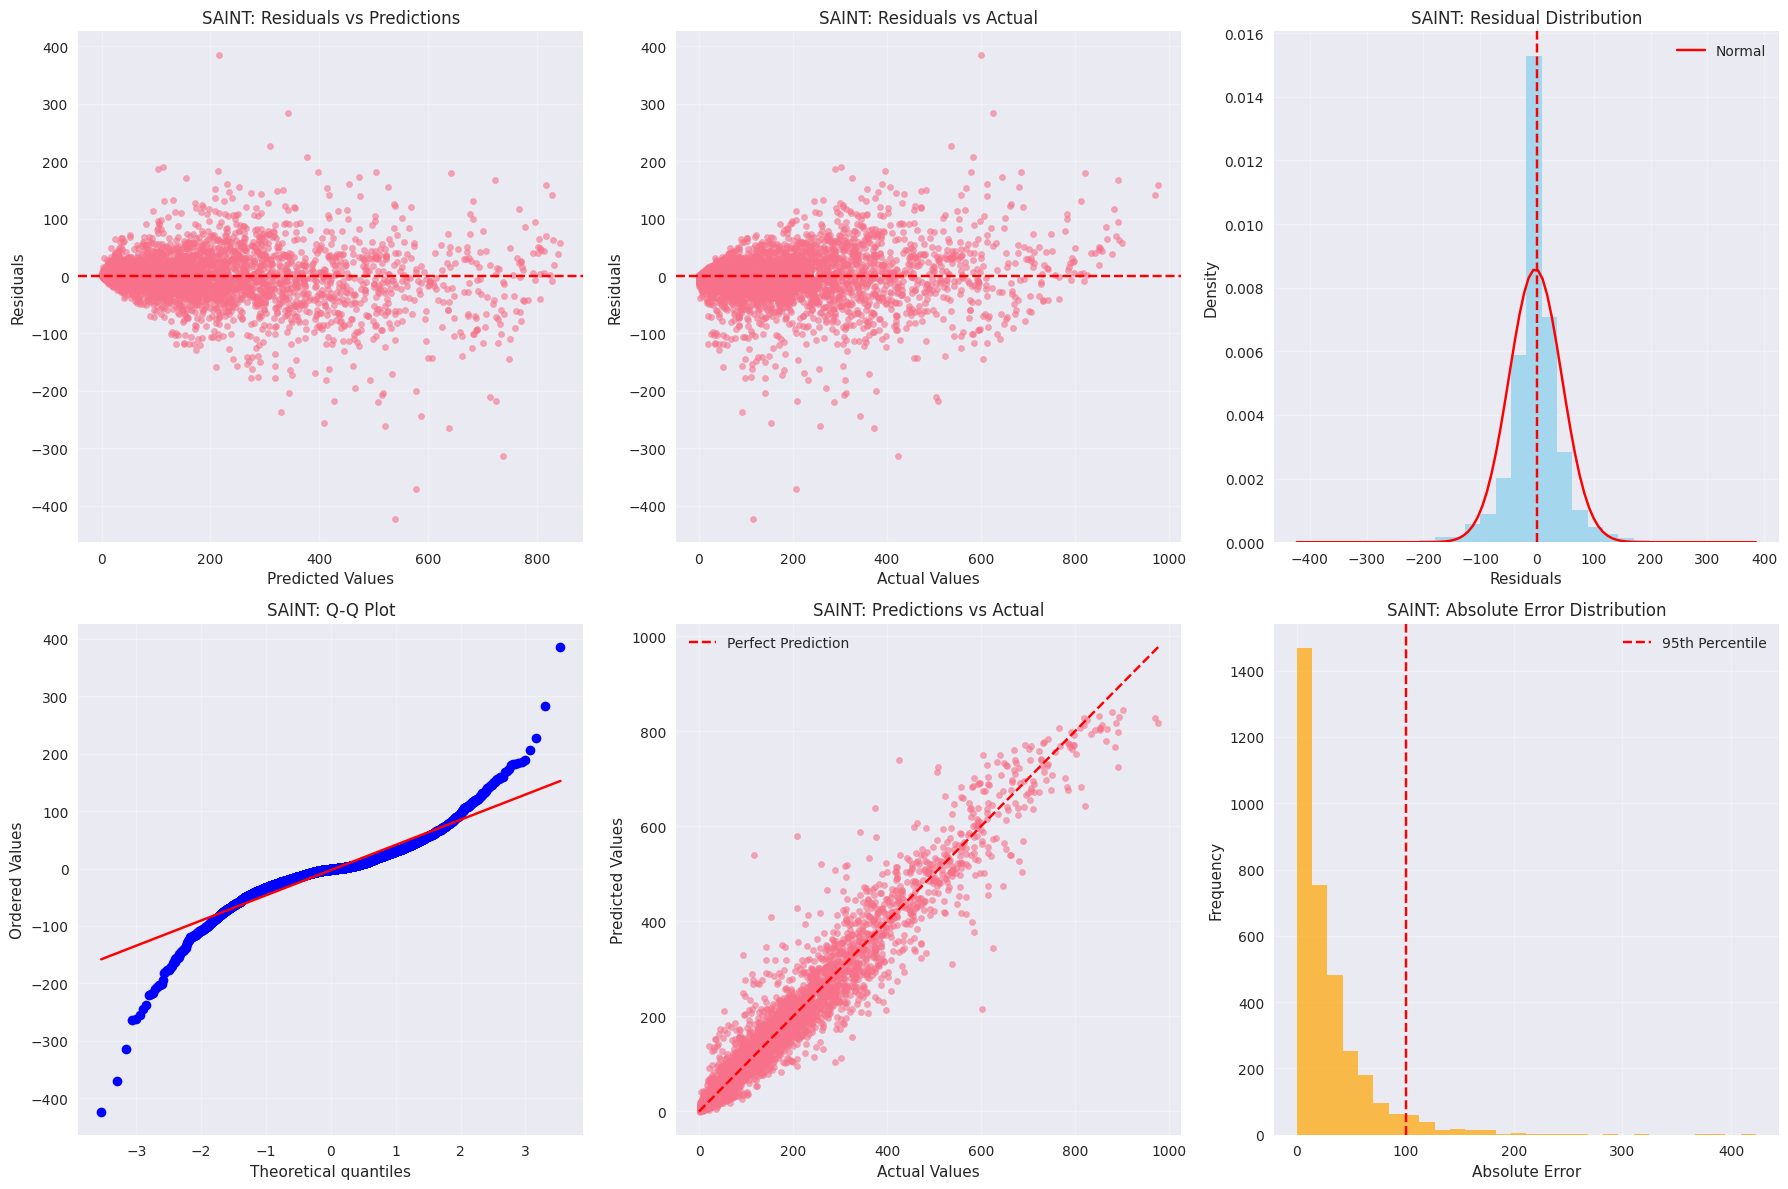

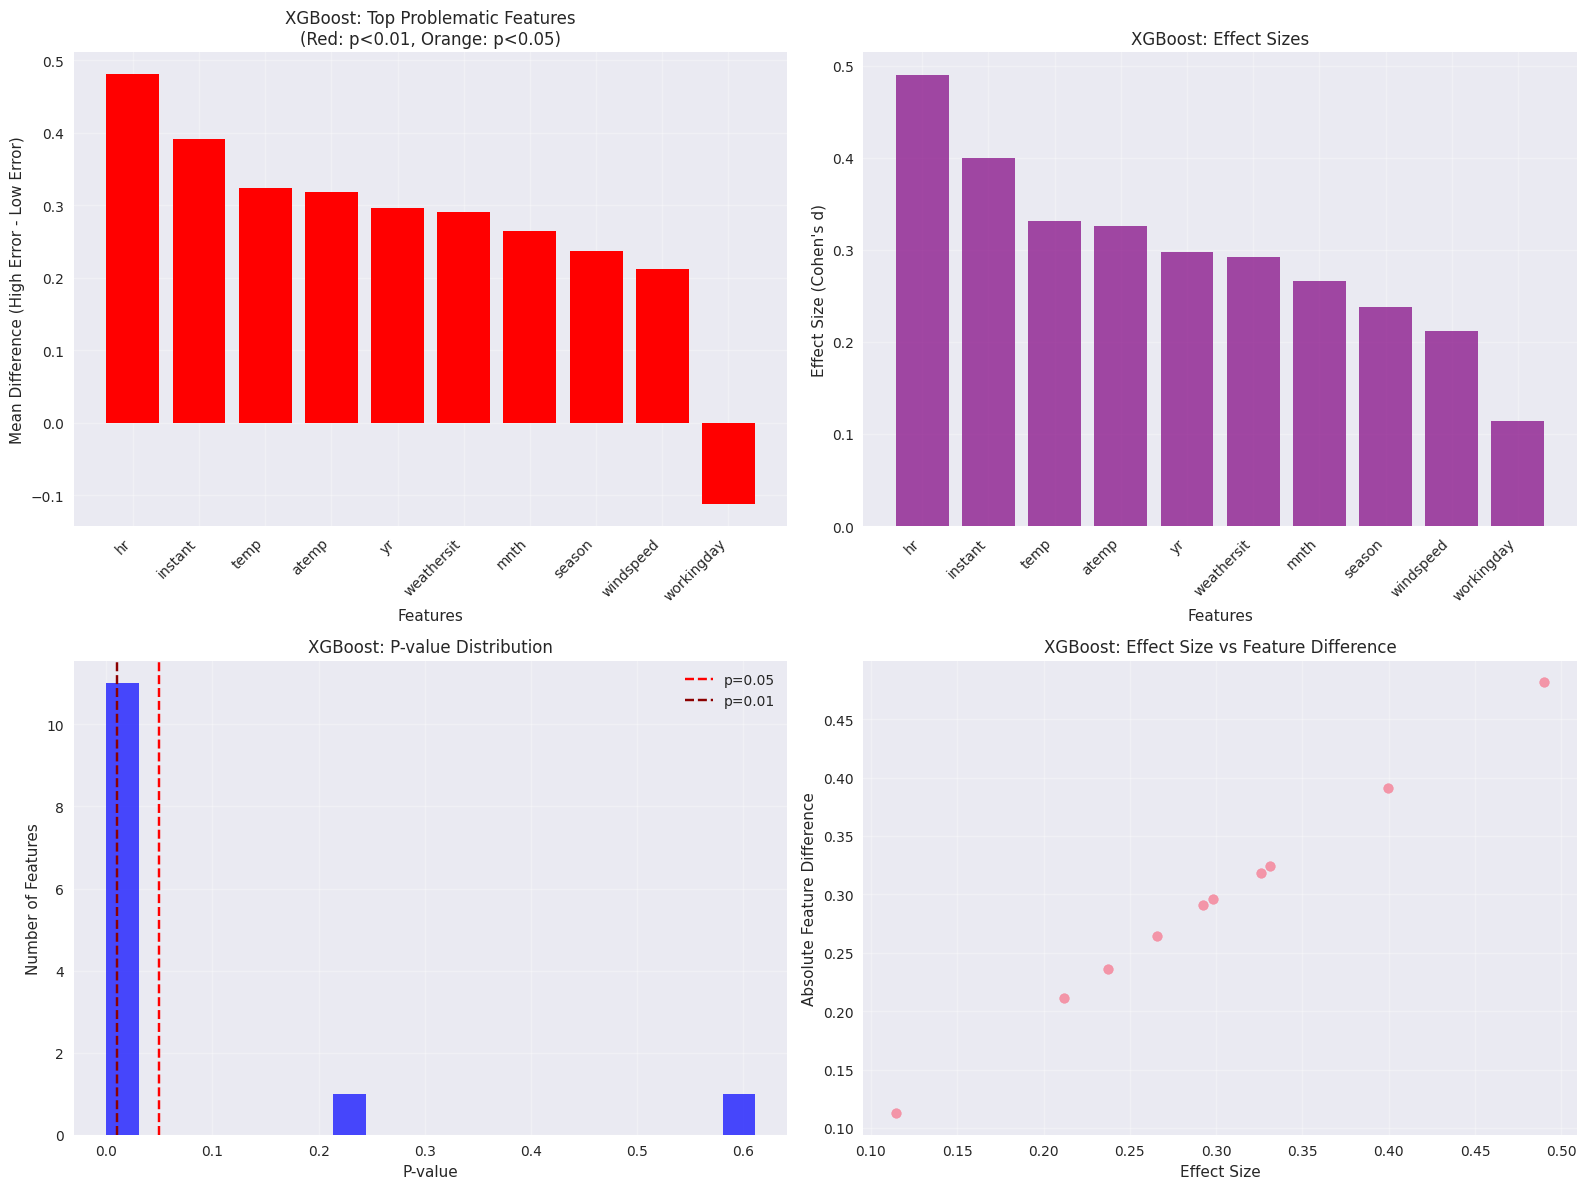

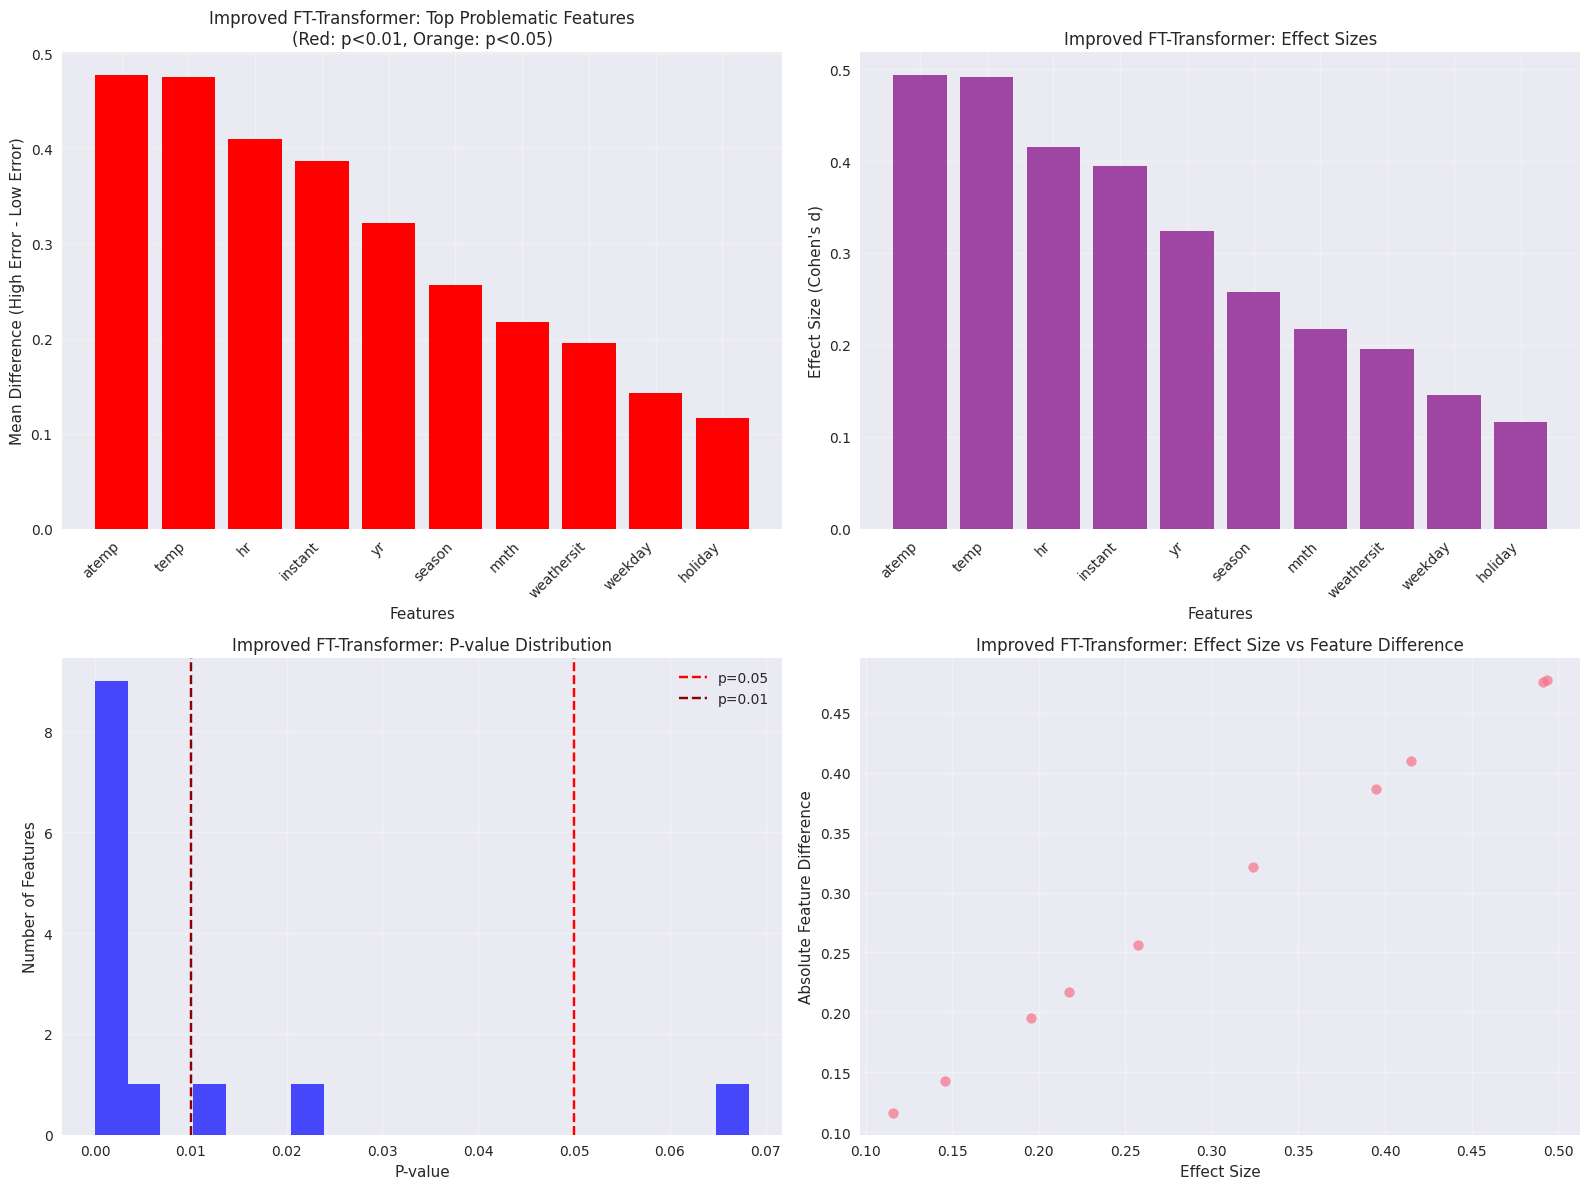

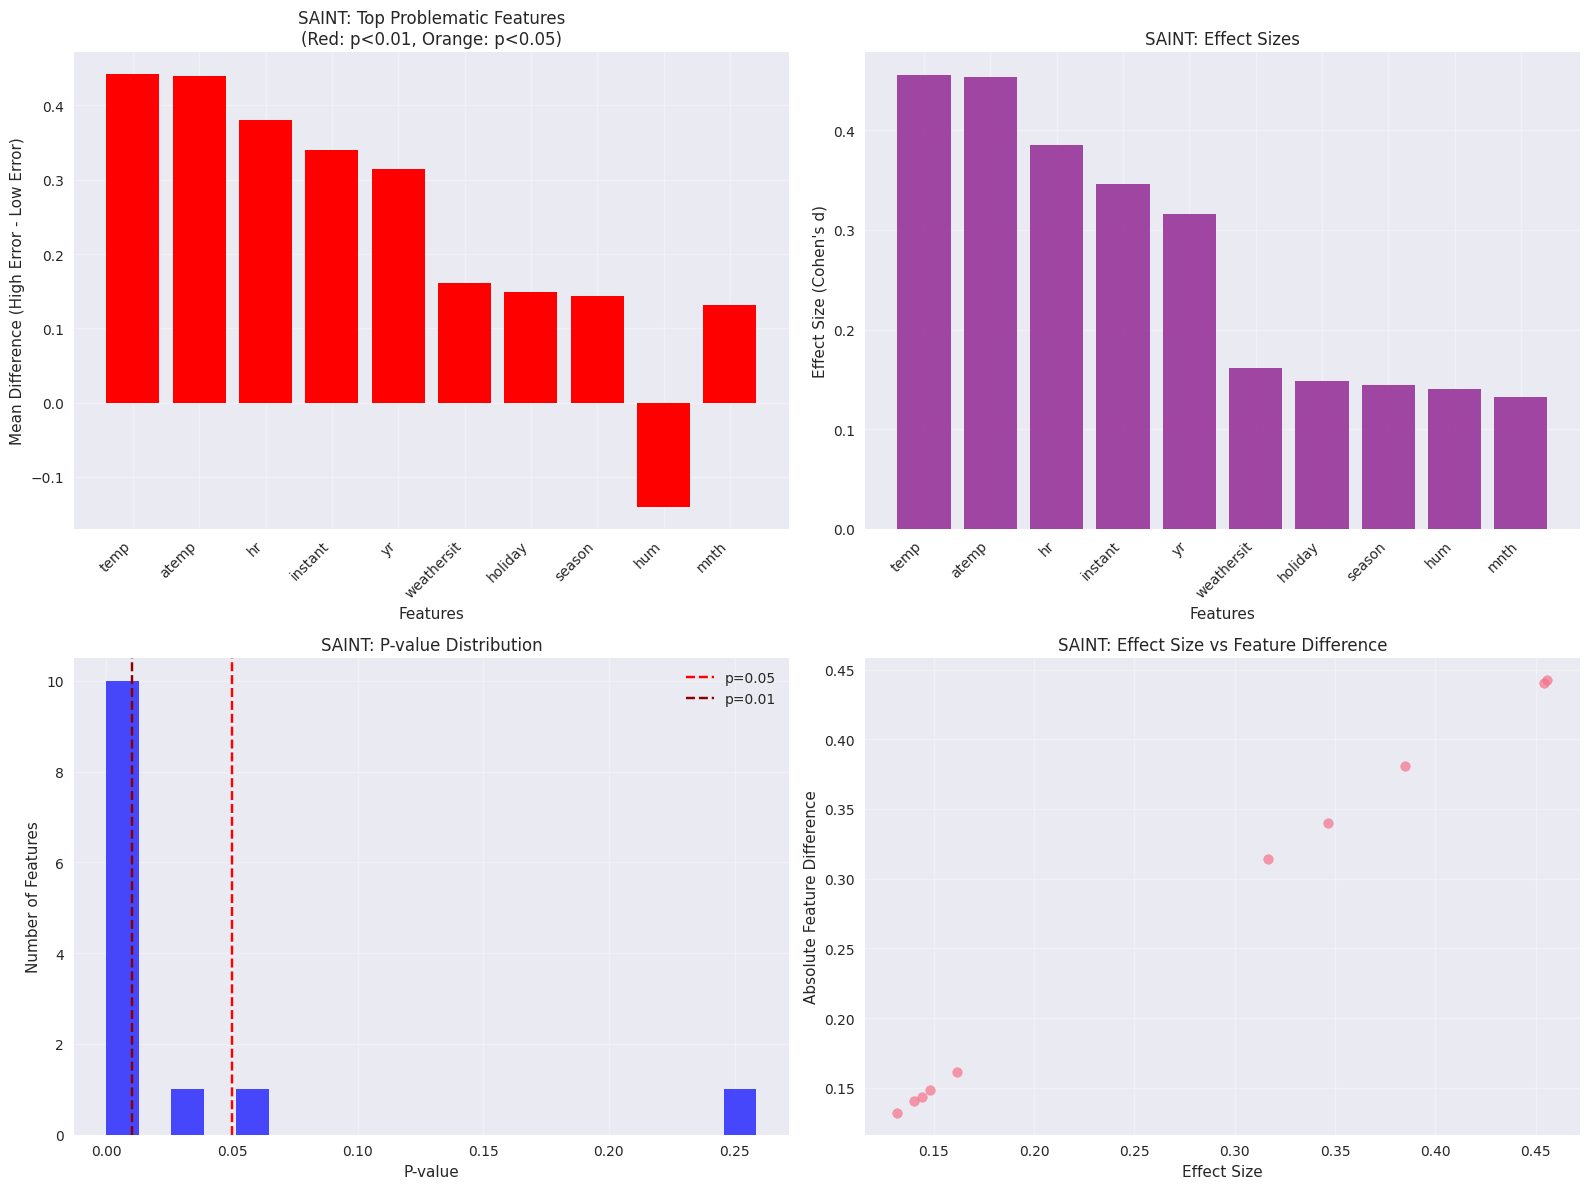


📊 Error visualizations generated and saved to Section4_ErrorAnalysis/


In [9]:
# Generate comprehensive error visualizations
generate_error_visualizations(
    error_metrics, predictions, y_test, feature_error_analysis, feature_names
)

print("\n📊 Error visualizations generated and saved to Section4_ErrorAnalysis/")

### 4.8 Model-Specific Error Analysis

In [10]:
# Analyze model-specific error patterns
model_insights = analyze_model_specific_errors(
    models, predictions, error_metrics, y_test, feature_names
)

print("\n✅ Model-specific error analysis completed!")
print(f"Generated insights for {len(model_insights)} models")


🔍 MODEL-SPECIFIC ERROR ANALYSIS

📊 XGBOOST ERROR ANALYSIS
------------------------------------------------------------
RMSE: 37.9232
MAE: 23.8845
R²: 0.9546
MAPE: 0.45%
Max Error: 386.8456
95th Percentile Error: 75.7231

Residual Analysis:
  Mean: -0.3584
  Std: 37.9215
  Skewness: -0.7110
  Kurtosis: 13.5909
🌳 XGBoost-Specific Insights:
  - Tree-based model captures non-linear relationships well
  - Large errors may indicate insufficient trees or depth
  - Consider feature engineering for better performance
  - Residual patterns suggest potential overfitting if highly skewed

📊 IMPROVED FT-TRANSFORMER ERROR ANALYSIS
------------------------------------------------------------
RMSE: 44.1403
MAE: 27.9566
R²: 0.9385
MAPE: 0.39%
Max Error: 438.7831
95th Percentile Error: 90.1096

Residual Analysis:
  Mean: -3.1049
  Std: 44.0310
  Skewness: -1.0791
  Kurtosis: 11.5480
🤖 FT-Transformer-Specific Insights:
  - Attention mechanism captures feature interactions
  - Large errors may indicate i

### 4.9 Generate Business Insights

In [11]:
# Generate actionable business insights
business_insights = generate_business_insights(
    error_metrics, predictions, feature_error_analysis, feature_names
)

print("\n💼 Business insights generated!")
print(f"Best model for deployment: {business_insights['best_model']}")
print(f"Potential improvement: {business_insights['improvement_potential']:.1f}%")


💼 BUSINESS INSIGHTS FROM ERROR ANALYSIS

🏆 Model Performance Ranking:
   1. XGBoost: R²=0.9546, RMSE=37.9232
   2. Improved FT-Transformer: R²=0.9385, RMSE=44.1403
   3. SAINT: R²=0.9316, RMSE=46.5453

🎯 Recommended Model: XGBoost
   - Explains 95.5% of variance in bike sharing demand
   - Average prediction error: ±37.92 bikes

📊 Feature-Based Error Patterns:
   Most problematic features (causing high errors):
     1. hr: Average effect size = 0.430
     2. temp: Average effect size = 0.426
     3. atemp: Average effect size = 0.425
     4. instant: Average effect size = 0.380
     5. yr: Average effect size = 0.313

📋 Business Recommendations:
   1. Deploy XGBoost for production bike sharing demand prediction
   2. Monitor prediction accuracy especially during extreme weather conditions
   3. Focus data collection efforts on improving problematic features
   4. Consider ensemble methods combining top 2-3 models for robustness
   5. Implement real-time model monitoring to detect perf

### 4.10 Save Results

In [12]:
# Save all error analysis results
results_dir = save_error_analysis_results(
    error_metrics, predictions, feature_error_analysis, comparison_df, business_insights
)

print(f"\n💾 All results saved to: {results_dir}")


💾 Saving error analysis results...
   ✅ Error metrics summary saved
   ✅ Feature error analysis saved
   ✅ Business insights saved
   ✅ Cross-model comparison saved

💾 All results saved to: ./Section4_ErrorAnalysis/


## 5. Advanced Error Pattern Analysis

Additional analyses for deeper insights:

### 5.1 Compare Error Patterns Across Models

In [13]:
# Compare specific error patterns across models
if 'error_metrics' in locals() and 'predictions' in locals():
    pattern_analysis = compare_error_patterns_across_models(error_metrics, predictions, y_test)
    
    print("\n📈 ERROR PATTERN COMPARISON COMPLETED")
    print("Check the detailed analysis above for bias and error distribution patterns.")
else:
    print("⚠️ Please run the error analysis first to compare patterns.")


🔄 Comparing error patterns across models...
   XGBoost:
     Underestimation tendency: 48.4%
     High demand error: 38.3379
     Low demand error: 10.3252
   Improved FT-Transformer:
     Underestimation tendency: 50.7%
     High demand error: 45.4213
     Low demand error: 9.5961
   SAINT:
     Underestimation tendency: 46.3%
     High demand error: 51.3016
     Low demand error: 8.4094

📈 ERROR PATTERN COMPARISON COMPLETED
Check the detailed analysis above for bias and error distribution patterns.


### 5.2 Temporal Error Pattern Analysis

In [14]:
# Analyze temporal error patterns (by prediction magnitude ranges)
if 'error_metrics' in locals() and 'predictions' in locals():
    temporal_analysis = analyze_temporal_error_patterns(error_metrics, predictions, y_test)
    
    print("\n⏰ TEMPORAL ERROR PATTERN ANALYSIS COMPLETED")
    print("Check the analysis above for error patterns across different prediction ranges.")
else:
    print("⚠️ Please run the error analysis first to analyze temporal patterns.")


⏰ Analyzing temporal error patterns...
   XGBoost:
     Low prediction range error: 11.0772
     Medium prediction range error: 22.2741
     High prediction range error: 38.3514
   Improved FT-Transformer:
     Low prediction range error: 11.9213
     Medium prediction range error: 27.5124
     High prediction range error: 44.4496
   SAINT:
     Low prediction range error: 9.6364
     Medium prediction range error: 30.0592
     High prediction range error: 48.9630

⏰ TEMPORAL ERROR PATTERN ANALYSIS COMPLETED
Check the analysis above for error patterns across different prediction ranges.


## 6. Results Summary

Display key results and insights from the analysis:

In [15]:
# Display key results summary
if 'results' in locals() and results is not None:
    print("🎯 ANALYSIS RESULTS SUMMARY")
    print("=" * 50)
    print(f"Models Analyzed: {results['models_analyzed']}")
    
    # Best model performance
    best_model = results['business_insights']['best_model']
    best_metrics = results['error_metrics'][best_model]
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"   RMSE: {best_metrics['RMSE']:.4f}")
    print(f"   MAE: {best_metrics['MAE']:.4f}")
    print(f"   R²: {best_metrics['R2']:.4f}")
    print(f"   MAPE: {best_metrics['MAPE']:.2f}%")
    
    # Model ranking
    print(f"\n📊 Model Ranking:")
    for i, model_info in enumerate(results['business_insights']['model_ranking']):
        print(f"   {i+1}. {model_info['model']}: R²={model_info['r2']:.4f}")
    
    # Problematic features
    if results['business_insights']['problematic_features']:
        print(f"\n🎯 Most Problematic Features:")
        for i, (feature, effect) in enumerate(results['business_insights']['problematic_features'][:5]):
            print(f"   {i+1}. {feature}: Effect size = {effect:.3f}")
    
    print(f"\nResults saved to: {results['results_dir']}")
    print("\n📊 Generated visualizations and reports in ./Section4_ErrorAnalysis/")
    
elif 'error_metrics' in locals():
    print("🎯 STEP-BY-STEP ANALYSIS COMPLETED")
    print("=" * 50)
    print(f"Models Analyzed: {list(error_metrics.keys())}")
    
    # Find best model by R²
    best_model = max(error_metrics.keys(), key=lambda x: error_metrics[x]['R2'])
    best_metrics = error_metrics[best_model]
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"   RMSE: {best_metrics['RMSE']:.4f}")
    print(f"   MAE: {best_metrics['MAE']:.4f}")
    print(f"   R²: {best_metrics['R2']:.4f}")
    print(f"   MAPE: {best_metrics['MAPE']:.2f}%")
    
    print("\n📊 Generated visualizations and reports in ./Section4_ErrorAnalysis/")
    
else:
    print("⚠️ No analysis results available. Please run the analysis first.")

🎯 STEP-BY-STEP ANALYSIS COMPLETED
Models Analyzed: ['XGBoost', 'Improved FT-Transformer', 'SAINT']

🏆 Best Model: XGBoost
   RMSE: 37.9232
   MAE: 23.8845
   R²: 0.9546
   MAPE: 0.45%

📊 Generated visualizations and reports in ./Section4_ErrorAnalysis/


## 7. Next Steps

After completing this error analysis, you can:

1. **Review Generated Files**: Check the `./Section4_ErrorAnalysis/` directory for:
   - Cross-model error comparison CSV
   - Residual analysis plots for each model
   - Feature-based error analysis visualizations
   - Business insights and recommendations

2. **Business Implementation**: Use the insights to:
   - Deploy the best-performing model for bike sharing demand prediction
   - Optimize bike distribution strategies based on error patterns
   - Improve data collection for problematic features
   - Implement real-time monitoring for model performance

3. **Model Improvement**: Consider:
   - Hyperparameter tuning for underperforming models
   - Feature engineering based on error analysis insights
   - Ensemble methods combining multiple models
   - Advanced regularization techniques for deep models

4. **Further Analysis**: Explore:
   - Seasonal error patterns in bike sharing demand
   - Weather-specific model performance
   - Real-time prediction monitoring and alerting
   - A/B testing different models in production